<a href="https://colab.research.google.com/github/tapickell/ml_python/blob/main/Chollet_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Linear Classifier using Tensorflow

In [2]:
import numpy as np

num_samples_per_class = 1000
negative_sample = np.random.multivariate_normal(
    [0,3], [[1,0.5],[0.5,1]], size=num_samples_per_class)
positive_sample = np.random.multivariate_normal(
    [3,0], [[1,0.5],[0.5,1]], size=num_samples_per_class)

inputs = np.vstack((negative_sample, positive_sample)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

# np.savez('sample_data.npz', inputs=inputs, targets=targets)

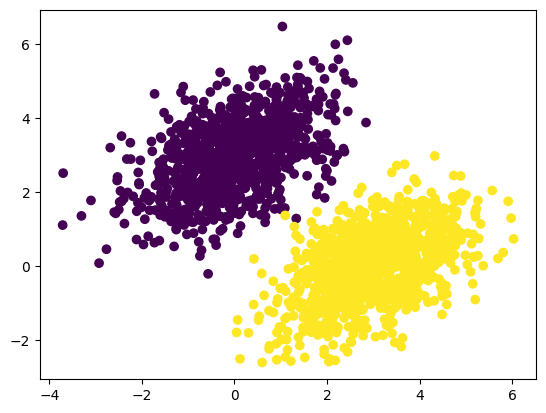

In [3]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [4]:
import tensorflow as tf

input_dim = 2
output_dim = 1

W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

In [5]:
def model(inputs, W, b):
    return (tf.matmul(inputs, W) + b)

def mean_squared_error(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

LEARNING_RATE = 0.1

@tf.function(jit_compile=True)
def train_step(inputs, targets, W, b):
  with tf.GradientTape() as tape:
    predictions = model(inputs, W, b)
    loss = mean_squared_error(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * LEARNING_RATE)
  b.assign_sub(grad_loss_wrt_b * LEARNING_RATE)
  return loss

In [6]:
for step in range(40):
  loss = train_step(inputs, targets, W, b)
  print(f'Loss at step {step}: {loss}')

Loss at step 0: 0.12781541049480438
Loss at step 1: 0.08679240942001343
Loss at step 2: 0.08151122182607651
Loss at step 3: 0.0766938179731369
Loss at step 4: 0.07229702919721603
Loss at step 5: 0.06828386336565018
Loss at step 6: 0.06462083756923676
Loss at step 7: 0.06127741560339928
Loss at step 8: 0.05822568014264107
Loss at step 9: 0.05544020235538483
Loss at step 10: 0.05289775878190994
Loss at step 11: 0.05057711899280548
Loss at step 12: 0.04845896363258362
Loss at step 13: 0.046525612473487854
Loss at step 14: 0.04476093500852585
Loss at step 15: 0.043150223791599274
Loss at step 16: 0.041680045425891876
Loss at step 17: 0.040338125079870224
Loss at step 18: 0.03911329060792923
Loss at step 19: 0.03799531236290932
Loss at step 20: 0.03697487711906433
Loss at step 21: 0.03604348003864288
Loss at step 22: 0.03519333899021149
Loss at step 23: 0.03441736847162247
Loss at step 24: 0.033709101378917694
Loss at step 25: 0.03306262195110321
Loss at step 26: 0.032472554594278336
Loss a

I0000 00:00:1727570697.899261 211545110 service.cc:146] XLA service 0x6000028c9e00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727570697.899465 211545110 service.cc:154]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1727570698.017017 211545110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


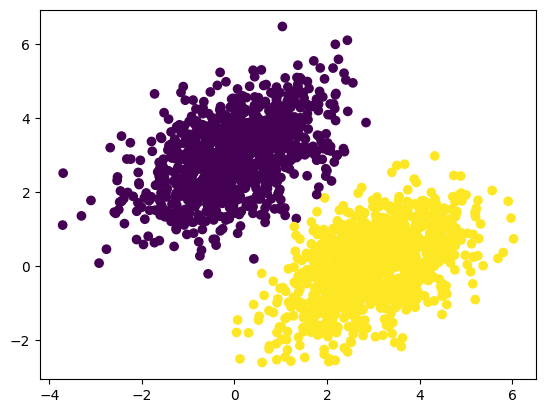

In [7]:

predictions = model(inputs, W, b)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

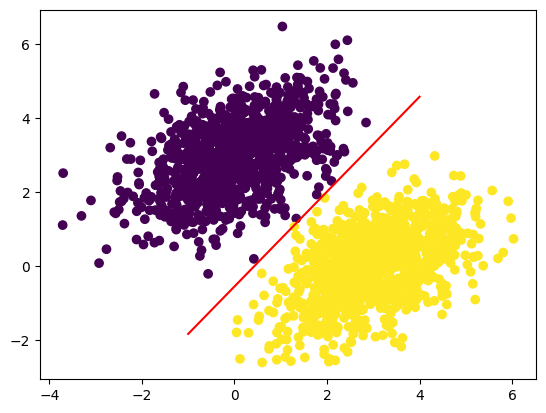

In [8]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

## Linear Classifier using PyTorch

In [9]:
import torch

input_dim = 2
output_dim = 1

W = torch.rand(input_dim, output_dim, requires_grad=True)
b = torch.zeros(output_dim, requires_grad=True)

def model(inputs, W, b):
    return (torch.matmul(inputs, W) + b)

def mean_squared_error(targets, predictions):
  per_sample_losses = torch.square(targets - predictions)
  return torch.mean(per_sample_losses)

LEARNING_RATE = 0.1

def train_step(inputs, targets, W, b):
  predictions = model(inputs, W, b)
  loss = mean_squared_error(targets, predictions)
  loss.backward()
  grad_loss_wrt_W = W.grad
  grad_loss_wrt_b = b.grad
  with torch.no_grad():
    W -= grad_loss_wrt_W * LEARNING_RATE
    b -= grad_loss_wrt_b * LEARNING_RATE
  W.grad = None
  b.grad = None
  return loss



In [10]:
class LinearModel(torch.nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.W = torch.nn.Parameter(torch.rand(input_dim, output_dim))
    self.b = torch.nn.Parameter(torch.zeros(output_dim))

  def forward(self, inputs):
    return (torch.matmul(inputs, self.W) + self.b)

model = LinearModel(input_dim, output_dim)

optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

def train_step(inputs, targets):
  predictions = model(inputs)
  loss = mean_squared_error(targets, predictions)
  loss.backward()
  optimizer.step()
  model.zero_grad()
  return loss

compiled_model = model.compile()

## Linear Classifier using JAX

In [11]:
!pip install jax

/Users/toddpickell/miniconda3/lib/python3.12/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [12]:
from jax import numpy as jnp
import jax

def model(inputs, W, b):
    return jnp.matmul(inputs, W) + b

def mean_squared_error(targets, predictions):
  per_sample_losses = jnp.square(targets - predictions)
  return jnp.mean(per_sample_losses)

def loss(state, inputs, targets):
  W, b = state
  predictions = model(inputs, W, b)
  loss = mean_squared_error(targets, predictions)
  return loss

grad_fn = jax.value_and_grad(loss)

@jax.jit
def train_step(inputs, targets, W, b):
  loss, grads = grad_fn((W, b), inputs, targets)
  grad_wrt_W, grad_wrt_b = grads
  W = W - grad_wrt_W * LEARNING_RATE
  b = b - grad_wrt_b * LEARNING_RATE
  return loss, W, b

input_dim = 2
output_dim = 1

W = jnp.array(np.random.uniform(size=(input_dim, output_dim)))
b = jnp.array(np.zeros(output_dim))
state = (W, b)

for step in range(40):
  loss, W, b = train_step(inputs, targets, W, b)
  print(f'Loss at step {step}: {loss}')

Loss at step 0: 0.5035002827644348
Loss at step 1: 0.09016295522451401
Loss at step 2: 0.07392969727516174
Loss at step 3: 0.06862594932317734
Loss at step 4: 0.0648093968629837
Loss at step 5: 0.06143619120121002
Loss at step 6: 0.058369167149066925
Loss at step 7: 0.055571023374795914
Loss at step 8: 0.05301714688539505
Loss at step 9: 0.050686098635196686
Loss at step 10: 0.04855843633413315
Loss at step 11: 0.04661639779806137
Loss at step 12: 0.044843800365924835
Loss at step 13: 0.043225858360528946
Loss at step 14: 0.041749075055122375
Loss at step 15: 0.04040113463997841
Loss at step 16: 0.039170801639556885
Loss at step 17: 0.03804781660437584
Loss at step 18: 0.037022802978754044
Loss at step 19: 0.036087214946746826
Loss at step 20: 0.035233259201049805
Loss at step 21: 0.03445380926132202
Loss at step 22: 0.03374236077070236
Loss at step 23: 0.033092986792325974
Loss at step 24: 0.032500267028808594
Loss at step 25: 0.03195926547050476
Loss at step 26: 0.03146545588970184
L

## Keras

In [15]:
import os
os.environ['KERAS_BACKEND'] = 'jax'

import keras
from keras import layers
from keras import optimizers

# model = keras.Sequential([
#   layers.Dense(32, activation='relu'),
#   layers.Dense(64, activation='relu'),
#   layers.Dense(32, activation='relu'),
#   layers.Dense(10, activation='softmax')
# ])

# model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

model = keras.Sequential([layers.Dense(1)])
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.1),
    loss="mean_squared_error",
    metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
validation_inputs = shuffled_inputs[:num_validation_samples]
validation_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(validation_inputs, validation_targets))

loss_and_metrics = model.evaluate(inputs, targets)
print(loss_and_metrics)


Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9152 - loss: 0.1714 - val_binary_accuracy: 0.9550 - val_loss: 0.0908
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - binary_accuracy: 0.9652 - loss: 0.0735 - val_binary_accuracy: 0.9950 - val_loss: 0.0937
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - binary_accuracy: 0.9554 - loss: 0.0747 - val_binary_accuracy: 1.0000 - val_loss: 0.0280
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - binary_accuracy: 0.9414 - loss: 0.0745 - val_binary_accuracy: 1.0000 - val_loss: 0.0275
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - binary_accuracy: 0.9562 - loss: 0.0714 - val_binary_accuracy: 0.9983 - val_loss: 0.0328
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - binary_accuracy: 0.9985 - loss: 0.0257
[0.03400126099586487, 0.9955000281333923]


In [17]:
predictions = model.predict(validation_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
[[ 0.98012483]
 [ 0.9753113 ]
 [-0.10787314]
 [-0.08523172]
 [ 0.9238609 ]
 [ 0.04757139]
 [-0.09375978]
 [-0.3014565 ]
 [-0.1011799 ]
 [ 0.88543534]]
